In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from lib.mlp import MLP

In [5]:
# Data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T

# Labels
y = np.array([[0, 1, 1, 0]])

In [6]:
# Single layer perceptron
slp = MLP(layers=[2, 10, 1])
error = slp.fit(x, y, epochs=1000, eta=3)

In [7]:
def plot(x, y, model, zoom_out_ratio=1.1):

    # Find data bounds
    x1_min, x2_min = x.min(axis=1)
    x1_max, x2_max = x.max(axis=1)

    x1_range = x1_max - x1_min
    x2_range = x2_max - x2_min

    # Enlarge data bounds for prettier plotting
    x1_min -= (zoom_out_ratio - 1) * x1_range
    x1_max += (zoom_out_ratio - 1) * x1_range
    x2_min -= (zoom_out_ratio - 1) * x2_range
    x2_max += (zoom_out_ratio - 1) * x2_range

    # Generate background
    size = 100
    x1 = np.linspace(x1_min, x1_max, num=size)
    x2 = np.linspace(x2_min, x2_max, num=size)
    background = np.ones(shape=(size, size))
    for i1, v1 in enumerate(x1):
        for i2, v2 in enumerate(x2):
            background[i1, i2] = model.predict(np.array([[v1], [v2]]))

    # Plot background
    fig, ax = plt.subplots()
    ax.imshow(background, extent=[x1_min, x1_max, x2_min, x2_max], cmap='coolwarm_r')

    # Plot data
    ax.plot(*x[:, y[0] == 0], 'wo', markersize=9)
    ax.plot(*x[:, y[0] == 0], 'bo', markersize=6)
    ax.plot(*x[:, y[0] == 1], 'wo', markersize=9)
    ax.plot(*x[:, y[0] == 1], 'ro', markersize=6)

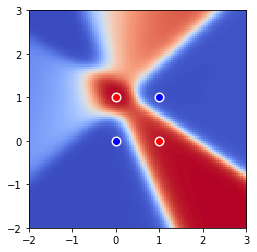

In [8]:
plot(x, y, slp, zoom_out_ratio=2)